In [1]:
url = "https://www.worldometers.info/coronavirus/"

In [5]:
# !pip install beautifulsoup4
# !pip install lxml
# !pip install requests

In [6]:
import requests

In [8]:
html = requests.get(url).content

In [9]:
type(html)

bytes

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID Live - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t
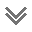

In [10]:
html

In [11]:
from bs4 import BeautifulSoup

In [12]:
soup = BeautifulSoup(html, 'html.parser')


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-tou
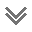

In [13]:
soup

In [14]:
type(soup)

bs4.BeautifulSoup

In [16]:
tb = soup.find('tbody')

In [18]:
tr = tb.find_all('tr')

In [30]:
tr[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">103,151,843</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,121,725                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">100,061,532</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">1,968,586</td>
<td style="font-weight: bold; text-align:right">4,815</td>
<td style="font-weight: bold; text-align:right">308,095</td>
<td style="font-weight: bold; text-align:right">3,350</td>
<td style="font-weight: bold; text-align:right">1,155,997,944</td>
<td style="font-weight: bold; text-align:right">3,4

In [33]:
all_data = []
for index in range(8, len(tr)):
    country_data = []
    table_row = tr[index]
    table_data = table_row.find_all("td")
    for item in table_data:
        country_data.append(item.text)
    all_data.append(country_data)

In [34]:
all_data

[['1',
  'USA',
  '103,151,843',
  '',
  '1,121,725                                ',
  '',
  '100,061,532',
  '',
  '1,968,586',
  '4,815',
  '308,095',
  '3,350',
  '1,155,997,944',
  '3,452,747',
  '334,805,269 ',
  'North America',
  '3',
  '298',
  '0',
  '',
  '',
  '5,880'],
 ['2',
  'India',
  '44,681,523',
  '',
  '530,722                                ',
  '',
  '44,147,322',
  '',
  '3,479',
  '698',
  '31,765',
  '377',
  '912,362,106',
  '648,615',
  '1,406,631,776 ',
  'Asia',
  '31',
  '2,650',
  '2',
  '',
  '',
  '2'],
 ['3',
  'France',
  '39,421,144',
  '',
  '163,105                                ',
  '',
  '38,862,625',
  '',
  '395,414',
  '869',
  '601,074',
  '2,487',
  '271,490,188',
  '4,139,547',
  '65,584,518 ',
  'Europe',
  '2',
  '402',
  '0',
  '',
  '',
  '6,029'],
 ['4',
  'Germany',
  '37,562,191',
  '',
  '163,244                                ',
  '',
  '36,946,600',
  '+40,900',
  '452,347',
  '1,281',
  '447,789',
  '1,946',
  '122,332,384',
  

In [39]:
data = list(map(lambda x: x[1:10] + [x[14]], all_data))

In [40]:
list(data)

[['USA',
  '103,151,843',
  '',
  '1,121,725                                ',
  '',
  '100,061,532',
  '',
  '1,968,586',
  '4,815',
  '334,805,269 '],
 ['India',
  '44,681,523',
  '',
  '530,722                                ',
  '',
  '44,147,322',
  '',
  '3,479',
  '698',
  '1,406,631,776 '],
 ['France',
  '39,421,144',
  '',
  '163,105                                ',
  '',
  '38,862,625',
  '',
  '395,414',
  '869',
  '65,584,518 '],
 ['Germany',
  '37,562,191',
  '',
  '163,244                                ',
  '',
  '36,946,600',
  '+40,900',
  '452,347',
  '1,281',
  '83,883,596 '],
 ['Brazil',
  '36,560,497',
  '',
  '695,031                                ',
  '',
  '35,429,017',
  '',
  '436,449',
  '8,318',
  '215,353,593 '],
 ['Japan',
  '30,647,859',
  '',
  '60,411                                ',
  '',
  '21,271,832',
  '',
  '9,315,616',
  '656',
  '125,584,838 '],
 ['S. Korea',
  '29,654,090',
  '+54,343',
  '32,745                                ',
  '+76',
  

In [55]:
import pandas as pd
df = pd.DataFrame(data)

In [43]:
df.head()

0            1 2                                          3 4  \
0      USA  103,151,843    1,121,725                                     
1    India   44,681,523      530,722                                     
2   France   39,421,144      163,105                                     
3  Germany   37,562,191      163,244                                     
4   Brazil   36,560,497      695,031                                     

             5        6          7      8               9  
0  100,061,532           1,968,586  4,815    334,805,269   
1   44,147,322               3,479    698  1,406,631,776   
2   38,862,625             395,414    869     65,584,518   
3   36,946,600  +40,900    452,347  1,281     83,883,596   
4   35,429,017             436,449  8,318    215,353,593

In [56]:
df.columns = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases", "Serious Critical", "Population"]

In [46]:
df.head()

Country  Total Cases New Cases                               Total Deaths  \
0      USA  103,151,843            1,121,725                                   
1    India   44,681,523              530,722                                   
2   France   39,421,144              163,105                                   
3  Germany   37,562,191              163,244                                   
4   Brazil   36,560,497              695,031                                   

  New Deaths Total Recovered New Recovered Active Cases Serious Critical  \
0                100,061,532                  1,968,586            4,815   
1                 44,147,322                      3,479              698   
2                 38,862,625                    395,414              869   
3                 36,946,600       +40,900      452,347            1,281   
4                 35,429,017                    436,449            8,318   

       Population  
0    334,805,269   
1  1,406,631,776   
2     65,584,518   
3     83,883,596   
4    215,353,593

In [47]:
df.isnull().sum()

Country             0
Total Cases         0
New Cases           0
Total Deaths        0
New Deaths          0
Total Recovered     0
New Recovered       0
Active Cases        0
Serious Critical    0
Population          0
dtype: int64

In [57]:
import numpy as np
df.replace("", np.nan, inplace  = True)

In [58]:
df.isnull().sum()

Country               0
Total Cases           0
New Cases           224
Total Deaths          0
New Deaths          228
Total Recovered       2
New Recovered       197
Active Cases          0
Serious Critical     95
Population            0
dtype: int64

In [59]:
df.head()

Country  Total Cases New Cases                               Total Deaths  \
0      USA  103,151,843       NaN  1,121,725                                   
1    India   44,681,523       NaN    530,722                                   
2   France   39,421,144       NaN    163,105                                   
3  Germany   37,562,191       NaN    163,244                                   
4   Brazil   36,560,497       NaN    695,031                                   

  New Deaths Total Recovered New Recovered Active Cases Serious Critical  \
0        NaN     100,061,532           NaN    1,968,586            4,815   
1        NaN      44,147,322           NaN        3,479              698   
2        NaN      38,862,625           NaN      395,414              869   
3        NaN      36,946,600       +40,900      452,347            1,281   
4        NaN      35,429,017           NaN      436,449            8,318   

       Population  
0    334,805,269   
1  1,406,631,776   
2     65,584,518   
3     83,883,596   
4    215,353,593

# Dataframe to csv

In [62]:
df.to_csv("Covid Data.csv", index = False) #comma separated value

# Read CSV

In [63]:
newdf = pd.read_csv("Covid Data.csv")

In [64]:
newdf.head() #NaN means missing values

Country  Total Cases New Cases                               Total Deaths  \
0      USA  103,151,843       NaN  1,121,725                                   
1    India   44,681,523       NaN    530,722                                   
2   France   39,421,144       NaN    163,105                                   
3  Germany   37,562,191       NaN    163,244                                   
4   Brazil   36,560,497       NaN    695,031                                   

   New Deaths Total Recovered New Recovered Active Cases Serious Critical  \
0         NaN     100,061,532           NaN    1,968,586            4,815   
1         NaN      44,147,322           NaN        3,479              698   
2         NaN      38,862,625           NaN      395,414              869   
3         NaN      36,946,600       +40,900      452,347            1,281   
4         NaN      35,429,017           NaN      436,449            8,318   

       Population  
0    334,805,269   
1  1,406,631,776   
2     65,584,518   
3     83,883,596   
4    215,353,593

In [68]:
df.isnull().sum().plot.bar()

<AxesSubplot: >

<AxesSubplot: >

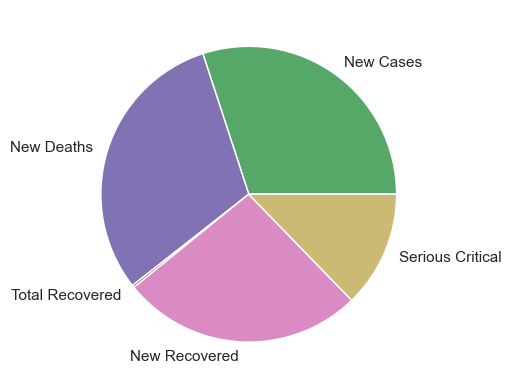

In [82]:
df.isnull().sum().plot.pie()

# Heatmap plot for missing data

In [76]:
import seaborn as sns 
sns.set()

In [74]:
df.isnull().T

0      1      2      3      4      5      6      7    \
Country           False  False  False  False  False  False  False  False   
Total Cases       False  False  False  False  False  False  False  False   
New Cases          True   True   True   True   True   True  False   True   
Total Deaths      False  False  False  False  False  False  False  False   
New Deaths         True   True   True   True   True   True  False   True   
Total Recovered   False  False  False  False  False  False  False  False   
New Recovered      True   True   True  False   True   True  False   True   
Active Cases      False  False  False  False  False  False  False  False   
Serious Critical  False  False  False  False  False  False  False  False   
Population        False  False  False  False  False  False  False  False   

                    8      9    ...    221    222    223    224    225    226  \
Country           False  False  ...  False  False  False  False  False  False   
Total Cases       False  False  ...  False  False  False  False  False  False   
New Cases          True   True  ...   True   True   True   True   True   True   
Total Deaths      False  False  ...  False  False  False  False  False  False   
New Deaths         True   True  ...   True   True   True   True   True   True   
Total Recovered   False  False  ...  False  False  False  False  False  False   
New Recovered     False   True  ...   True   True   True   True   True   True   
Active Cases      False  False  ...  False  False  False  False  False  False   
Serious Critical  False  False  ...   True   True   True   True   True   True   
Population        False  False  ...  False  False  False  False  False  False   

                    227    228    229    230  
Country           False  False  False  False  
Total Cases       False  False  False  False  
New Cases          True   True   True   True  
Total Deaths      False  False  False  False  
New Deaths         True   True   True   True  
Total Recovered   False  False   True  False  
New Recovered      True   True   True   True  
Active Cases      False  False  False  False  
Serious Critical   True   True   True  False  
Population        False  False  False  False  

[10 rows x 231 columns]

In [77]:
sns.heatmap(df.isnull().T)

<AxesSubplot: >

<AxesSubplot: >

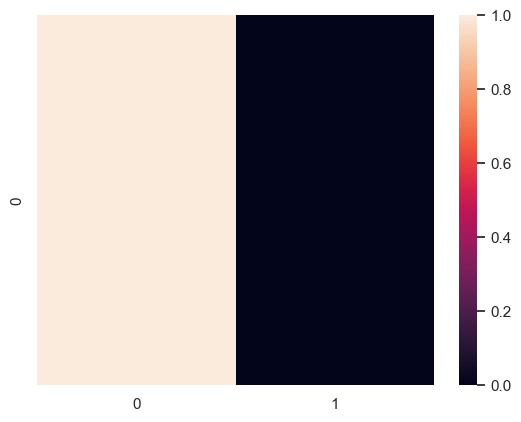

In [81]:
sns.heatmap([[True, False]])

In [60]:
import matplotlib.pyplot
%matplotlib inline

In [83]:
df.head()

Country  Total Cases New Cases                               Total Deaths  \
0      USA  103,151,843       NaN  1,121,725                                   
1    India   44,681,523       NaN    530,722                                   
2   France   39,421,144       NaN    163,105                                   
3  Germany   37,562,191       NaN    163,244                                   
4   Brazil   36,560,497       NaN    695,031                                   

  New Deaths Total Recovered New Recovered Active Cases Serious Critical  \
0        NaN     100,061,532           NaN    1,968,586            4,815   
1        NaN      44,147,322           NaN        3,479              698   
2        NaN      38,862,625           NaN      395,414              869   
3        NaN      36,946,600       +40,900      452,347            1,281   
4        NaN      35,429,017           NaN      436,449            8,318   

       Population  
0    334,805,269   
1  1,406,631,776   
2     65,584,518   
3     83,883,596   
4    215,353,593

In [84]:
df.loc[df["Country"] == "Nepal"]

Country Total Cases New Cases                            Total Deaths  \
72   Nepal   1,001,031       NaN  12,020                                   

   New Deaths Total Recovered New Recovered Active Cases Serious Critical  \
72        NaN         988,986           NaN           25              NaN   

     Population  
72  30,225,582